In [6]:
# Install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import random
import geopandas as gpd
import plotly.graph_objects as go

In [88]:
# Import Datasets
df_geo = pd.read_csv('costcos-geocoded.csv')
df_cities = pd.read_csv('worldcities.csv')
df_nba = pd.read_csv('ppg2008.csv')
df_pharm = pd.read_csv('Pharma.csv')
df_Seasonal = pd.read_excel('Seasonally_Adjusted.xlsx')

In [9]:
tips = sns.load_dataset("tips")
fmri = sns.load_dataset("fmri")
iris = sns.load_dataset("iris")
mpg = sns.load_dataset("mpg")

In [93]:
# Heat Map
# Create confusion matrix
conf_matrix = [[432,5,5,3,3,3],
[11,456,21,2,5,5],
[4,1,342,2,6,13],
[3,5,25,567,30,96],
[1,4,15,10,459,124],
[2,4,18,18,84,494]]

In [95]:
# Create df with confusion matrix
pets = ['dogs', 'fish', 'cats', 'hamster', 'rock', 'Gerbil']
conf_matrix_df = pd.DataFrame(conf_matrix,columns=pets,index=pets)

Text(61.5, 0.5, 'Actual')

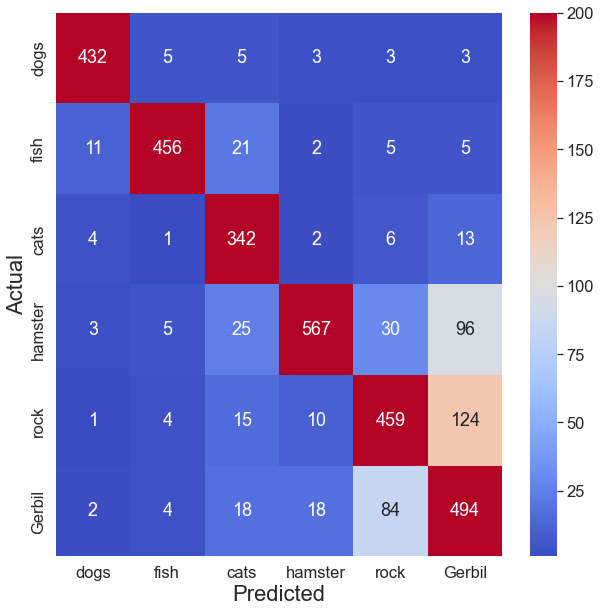

In [96]:
# Plot confusion matrix on Heat map
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

In [54]:
# Spatial Chart
# https://medium.com/the-data-science-publication/how-to-plot-geospatial-data-with-python-d788ee54dcd1#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6Ijc3Y2MwZWY0YzcxODFjZjRjMGRjZWY3YjYwYWUyOGNjOTAyMmM3NmIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NjY5ODc3MjAsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNzM1NTE5ODY1OTEwNTI2Njk1OCIsImVtYWlsIjoia2F0aWVhZGFtc0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IkthdGllIEFkYW1zIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FMbTV3dTFYeFVwczVzVkVpcEJkOVczRTJyZm5CVENVTVUzRkphREtGWWs1PXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IkthdGllIiwiZmFtaWx5X25hbWUiOiJBZGFtcyIsImlhdCI6MTY2Njk4ODAyMCwiZXhwIjoxNjY2OTkxNjIwLCJqdGkiOiIyN2M0ODA4M2IyZDI1MTFjNDM1MDhhMWI2MTZkMTY2YjcxM2UyM2Q1In0.Dj8X99EAuQ6Oi_NwdOVCfmsirlpOVqaR11DVzbMmwoK6LP1ExhUwkQrWadTYcu8e4Yx3BCtWQfGKxxPoC7VVfBmAHmiVXLEwK4kvQWhGGBn1Ubnxbyfc7aGrTQZT89kltlQM5IzqqPtVe-jNSe0ZF2BibibwFDq4SgZC9s5hjKlHol1rxzJeXUQggPR80AHuNSqMSiv5xUkjZqTSMBVjOYUdjUrjpF_kA8ACy3wdL8nQbp9WSbzUjKcOVW7LnWmjagjwPMALa_wJJShakrW0ryD2YXFpcf9c5dUtDC8ii85ZW_3rPS8EThfTRwxpNqa9PTQUCo-nnCGV6Z5TGnlLYg
df_cities.head(10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
5,Seoul,Seoul,37.5600,126.9900,South Korea,KR,KOR,Seoul,primary,22394000.0,1410836482
6,Mumbai,Mumbai,19.0758,72.8775,India,IN,IND,Mahārāshtra,admin,22186000.0,1356226629
7,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22118000.0,1156073548
8,Mexico City,Mexico City,19.4333,-99.1333,Mexico,MX,MEX,Ciudad de México,primary,21505000.0,1484247881
9,Guangzhou,Guangzhou,23.1288,113.2590,China,CN,CHN,Guangdong,admin,21489000.0,1156237133


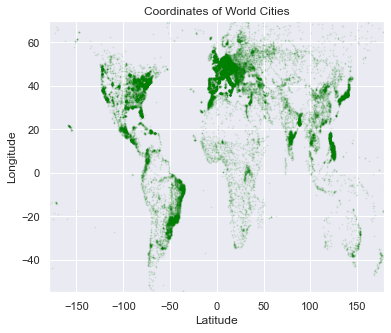

In [92]:
city_long_border = (-179, 179)
city_lat_border = (-55, 70)
ax = plt.scatter(df_cities['lng'].values, df_cities['lat'].values, color='green', s=0.5, label='train', alpha=0.1)
ax.axes.set_title('Coordinates of World Cities')
ax.figure.set_size_inches(6,5)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
# Contour Chart

In [63]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


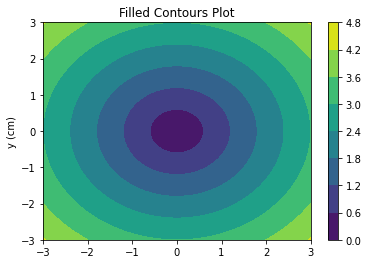

In [2]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [25]:
fig = go.Figure(data =
    go.Contour(
        z=[[90, 90.5, 42.5, 30.5, 10],
           [11.5, 2.25, 3.5, 11.5, 20],
           [7, 9, 10, 11, 11],
           [0.5, 2.25, 4, 3.25, 12],
           [0, 0.5, 3, 6.5, 11]],
        x=[0, 0.5, 1, 1.5, 2], # horizontal axis
        y=[0, 0.5, 1, 1.5, 2], # vertical axis
        contours_coloring='heatmap',
        colorbar=dict(
            title='Depth (m)', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')
    )))
fig.show()